<a href="https://colab.research.google.com/github/jackychencw/MIE1624_Course_Project_Group19/blob/Yao-Visualization-preprocess/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
from sys import platform

In [ ]:
# You may need to restart runtime after the installation by the instruction
!pip install spacytextblob

     |████████████████████████████████| 10.4MB 5.3MB/s 
     |████████████████████████████████| 1.1MB 35.6MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.1MB 4.2MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp37-none-any.whl size=12047109 sha256=edeef48dc083fd25b346dc28f84244bd3e911a1b7e90c92d8a7049541a7fa372
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ljhg6n4/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d8a0c662959da0058202094f46
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
# train_zip = 'train.zip'
# test_zip  = 'test.zip'
# train_file = 'train.csv'
# test_file = 'test.csv'

In [ ]:
# def is_colab():
#     return 'google.colab' in str(get_ipython())

# def check_file(filename):
#     if not os.path.exists(filename):
#         if is_colab():
#             from google.colab import files
#             print(f"Please upload {filename} file")
#             uploaded = files.upload()
#         else:
#             print(f"{filename} not exist, this notebook require {filename} to run")
#     else:
#         print(f"{filename} ready")

# def unzip(src, dest):
#     if not os.path.exists(dest):
#         if platform == "linux" or platform == "linux2":
#             !unzip {src} 
#         elif platform == "win32":
#             !tar -xf {src}
#         else:
#             print(f"Please unzip {src} manually")

# check_file(train_zip)
# check_file(test_zip)

# # System check
# # Unzip data files if not already exist
# unzip(train_zip, train_file)
# unzip(test_zip, test_file)

In [ ]:

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#train_file = "/content/drive/MyDrive/Colab Notebooks/train.csv"
#test_file = "/content/drive/MyDrive/Colab Notebooks/test.csv"
train_file = pd.read_csv("/content/drive/MyDrive/train.csv")
test_file = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
train_df, test_df = train_file, test_file
train_df.head()

,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,image
0,5.0,"08 26, 2014",u92990698,A contemporary jazz and soul performer who's m...,""" CLASSIQUE """,1409011200,Jazz,$8.40,p23649501,3856620,NaN
1,5.0,"05 11, 2003",u36200649,Very good idea to put both the 'pop' and 'orch...,Exceeded my Expectations - This album RAWKS!,1052611200,Alternative Rock,$10.98,p58458313,56086781,NaN
2,5.0,"12 5, 2017",u10721702,This is a great collection of Carole King's so...,A Must-have for Carole King Fans,1512432000,Pop,$5.99,p97027626,55852154,NaN
3,5.0,"09 24, 2013",u86003775,The is album is a brilliant piece of Jazz fusi...,A Master piece!,1379980800,Jazz,$14.64,p43167086,43228100,NaN
4,5.0,"01 14, 2015",u25672859,Waited a LONG time for this DVD to be released...,especially if you like concert videos,1421193600,Alternative Rock,$9.92,p94494236,54425467,NaN


In [ ]:
test_df.head()

,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,image
0,"02 11, 2017",u04140621,ok,Five Stars,1486771200,Pop,$31.20,p65721979,98944233,NaN
1,"01 29, 2018",u74766187,The 1955 and 1958 sets alone are worth the pur...,Buy It For the 1955 Set With Monk!,1517184000,Jazz,$34.04,p87809670,33903910,NaN
2,"08 29, 2005",u31689638,Mary J Blige is someone most people know of. S...,Mary's excellent debut! Classic!,1125273600,Pop,$1.72,p52702240,35386470,NaN
3,"11 2, 2015",u35613516,Very good satch album,Four Stars,1446422400,Pop,$10.99,p01314374,12404766,NaN
4,"01 3, 2012",u93320378,Well there are hundreds of Christmas anthologi...,CD lives up to its name,1325548800,Alternative Rock,$7.98,p84396269,68253688,NaN


In [ ]:
print(f'training set shape: {train_df.shape}')
print(f'testing set shape: {test_df.shape}')

training set shape: (150000, 11)
testing set shape: (20000, 10)


In [ ]:
print(f'Number of reviewText nan in training set: {train_df.reviewText.isna().sum()}')
print(f'Number of reviewText nan in testing set: {test_df.reviewText.isna().sum()}')

Number of reviewText nan in training set: 28
Number of reviewText nan in testing set: 3


In [ ]:
train_df.dropna(axis=0, subset=['reviewText'], inplace=True)
test_df.dropna(axis=0, subset=['reviewText'], inplace=True)

# Preprocess reviewText using NLP

In [ ]:
import spacy
import html
import re
from spacytextblob.spacytextblob import SpacyTextBlob
from tqdm import tqdm

nlp = spacy.load('en_core_web_sm')
sentencizer = nlp.create_pipe("sentencizer")
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)
nlp.add_pipe(sentencizer)
all_stopwords = nlp.Defaults.stop_words



def cleanhtml(raw_html):
  cleanr = re.compile('/<[^>]+>/')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

def clean(review):
  modReview = review
  # remove html tags and attributes
  modReview = cleanhtml(review)
  # replace newlines with spaces
  modReview = modReview.replace("\n", " ").replace("\r", " ")
  # unescape html
  modReview = html.unescape(modReview)
  # remove URLs
  # reference: https://stackoverflow.com/questions/3809401/what-is-a-good-regular-expression-to-match-a-url
  modReview = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", "", modReview)
  # lower case
  modReview = modReview.lower()
  # remove duplicate spaces
  modReview = " ".join(modReview.split())
  return modReview

def preproc_reviews(nlp, reviews):
  preproced_reviews = []
  polarities = []
  subjectivities = []
  # With as many processes as CPUs (use with caution!)
  for doc in tqdm(nlp.pipe(reviews, n_process=-1), mininterval=300):
    preproced_review = ""
    polarities.append(doc._.sentiment.polarity)
    subjectivities.append(doc._.sentiment.subjectivity)

    if len(doc.text) > 0:
      for sent in doc.sents:
        wordsList = []
        for token in sent:
          if len(token.text.strip()) != 0:
            # tagging
            #    * Write "/POS" after each token.
            tag = token.tag_

            #lemmatization
            if token.lemma_[0] == '-' and token.text[0] != '-':
                lemma = token.text
            else:
                lemma = token.lemma_
            
            # remove stop words
            if not lemma in all_stopwords:
              wordsList.append(lemma + "/" + tag)

        #    * Split tokens with spaces.
        sent = " ".join(wordsList)

        #    * Insert period between sentences.
        if sent and sent[-1] != '.':
            sent += '.'

        preproced_review += sent
        #    * Insert space between sentences.
        preproced_review += " "
      preproced_review = clean(preproced_review)
    preproced_reviews.append(preproced_review)
  return preproced_reviews, polarities, subjectivities

In [ ]:
# save the preprocessed df in local
preproced_train_df = pd.read_csv("/content/drive/MyDrive/preproced_train_df.csv")

In [ ]:
preproced_train_df.head()

,Unnamed: 0,overall,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,price,itemID,reviewHash,image,preproced_text,polarities,subjectivities
0,0,5.0,"08 26, 2014",u92990698,A contemporary jazz and soul performer who's m...,""" CLASSIQUE """,1409011200,Jazz,$8.40,p23649501,3856620,NaN,contemporary/jj jazz/nn soul/nn performer/jj -...,0.229849,0.426437
1,1,5.0,"05 11, 2003",u36200649,Very good idea to put both the 'pop' and 'orch...,Exceeded my Expectations - This album RAWKS!,1052611200,Alternative Rock,$10.98,p58458313,56086781,NaN,good/jj idea/nn '/`` pop/nn '/'' '/`` orchestr...,0.280937,0.460303
2,2,5.0,"12 5, 2017",u10721702,This is a great collection of Carole King's so...,A Must-have for Carole King Fans,1512432000,Pop,$5.99,p97027626,55852154,NaN,great/jj collection/nn carole/nnp king/nnp son...,0.800000,0.750000
3,3,5.0,"09 24, 2013",u86003775,The is album is a brilliant piece of Jazz fusi...,A Master piece!,1379980800,Jazz,$14.64,p43167086,43228100,NaN,album/nn brilliant/jj piece/nn jazz/nnp fusion...,0.680208,0.800000
4,4,5.0,"01 14, 2015",u25672859,Waited a LONG time for this DVD to be released...,especially if you like concert videos,1421193600,Alternative Rock,$9.92,p94494236,54425467,NaN,wait/vbd long/jj time/nn dvd/nn release/vbn ./...,0.129478,0.440930


### words frequency distribution analyzation:

In [ ]:
preproced_train_df['preproced_text'] = preproced_train_df['preproced_text'].str.replace("/(?=\w+)\w+", " ")
preproced_train_df['preproced_text'] = preproced_train_df['preproced_text'].str.replace("[^a-zA-Z]", " ")
preproced_train_df['preproced_text'] = preproced_train_df['preproced_text'].str.replace("rrb", " ")
preproced_train_df['preproced_text'] = preproced_train_df['preproced_text'].str.replace("lbr", " ")
preproced_train_df['preproced_text'] = preproced_train_df['preproced_text'].str.replace("lrb", " ")

In [ ]:
preproced_train_df['preproced_text']

0         contemporary  jazz  soul  performer     decade...
1         good  idea       pop            orchestral    ...
2                great  collection  carole  king  song     
3         album  brilliant  piece  jazz  fusion  start  ...
4         wait  long  time  dvd  release      watch     ...
                                ...                        
149967    wesley  voice  swoon  little  bit      voice  ...
149968    recording  verdis  requiem         ask  questi...
149969          good  overall  album      revisionist  f...
149970    believe      time      artist  like  enchantme...
149971    mokenstef  album  wanna  mellow  chill      my...
Name: preproced_text, Length: 149972, dtype: object

In [ ]:
# for wrods analyzation based on preproced_text
import itertools
import nltk
nltk.download('punkt') 
top_N = 20
preproced_trai_sent = preproced_train_df['preproced_text'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(preproced_trai_sent)
words_selected = [i for i in words if len(i) > 2]
words_dist = nltk.FreqDist(words_selected)
words_fre = pd.DataFrame(words_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
words_fre

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Word,Frequency
0,album,180634
1,song,161184
2,like,103104
3,good,102448
4,music,88058
5,great,81849
6,sound,72622
7,love,60617
8,track,58851
9,time,51758


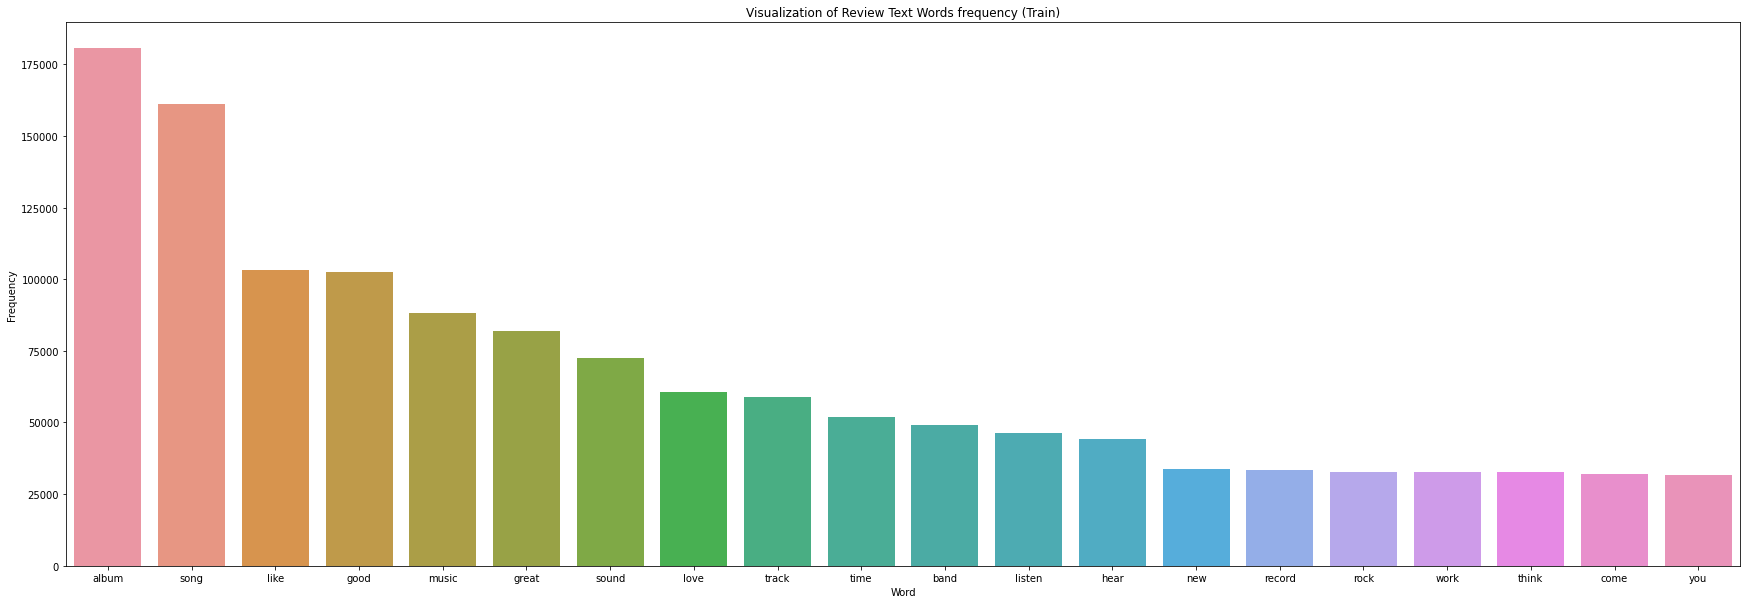

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,10))
sns.barplot(data=words_fre, x= 'Word', y = 'Frequency').set_title('Visualization of Review Text Words frequency (Train)')
plt.show()

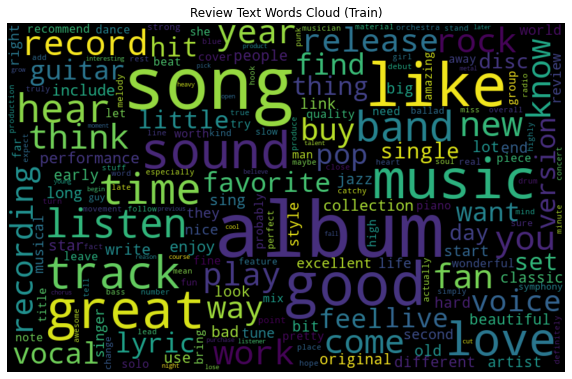

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate_from_frequencies(words_dist)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Review Text Words Cloud (Train)")
plt.axis('off')
plt.show()

In [109]:
high_star = preproced_train_df[preproced_train_df['overall'] == 5]
low_star = preproced_train_df[(preproced_train_df['overall'] == 1)|(preproced_train_df['overall'] == 2)] 

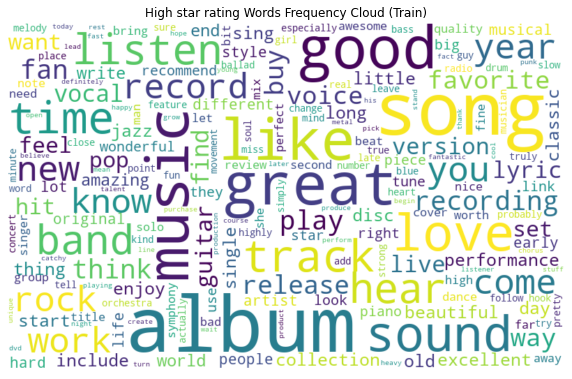

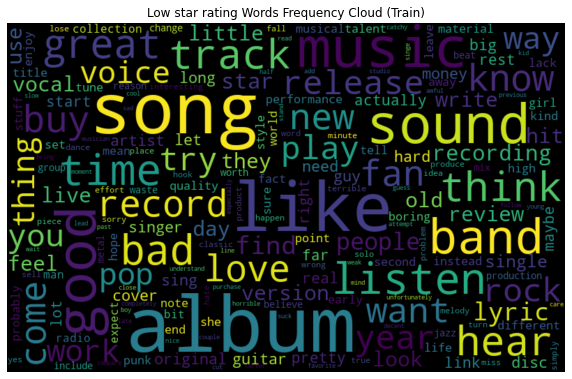

In [112]:
high_star_sent = high_star['preproced_text'].str.cat(sep=' ')
high_star_words = nltk.tokenize.word_tokenize(high_star_sent)
high_star_words_selected = [i for i in high_star_words if len(i) > 2]
high_star_words_dist = nltk.FreqDist(high_star_words_selected)

low_star_sent = low_star['preproced_text'].str.cat(sep=' ')
low_star_words = nltk.tokenize.word_tokenize(low_star_sent)
low_star_words_selected = [i for i in low_star_words if len(i) > 2]
low_star_words_dist = nltk.FreqDist(low_star_words_selected)

# use WorldCloud package to plot the cloud figure about genetic tweet sentiment
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate_from_frequencies(dict(high_star_words_dist))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("High star rating Words Frequency Cloud (Train)")
plt.axis('off')
plt.show()
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="black").generate_from_frequencies(dict(low_star_words_dist))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Low star rating Words Frequency Cloud (Train)")
plt.axis('off')
plt.show()

In [57]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [54]:
category_df= pd.DataFrame(preproced_train_df['category'].value_counts())
category_df

,category
Pop,68865
Alternative Rock,42768
Jazz,14844
Classical,14091
Dance & Electronic,9404


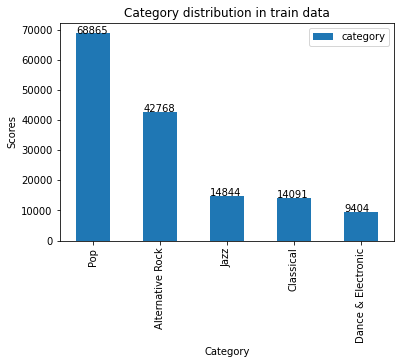

In [79]:

category = category_df.plot.bar()
for p in category.patches:
    category.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1))
plt.xlabel('Category')  
plt.ylabel('Scores')
plt.title('Category distribution in train data')
plt.show()

For Overall star rating from 1 to 5:

In [81]:
overall_df= pd.DataFrame(preproced_train_df['overall'].value_counts())
overall_df

,overall
5.0,98185
4.0,29648
3.0,12154
2.0,5213
1.0,4772


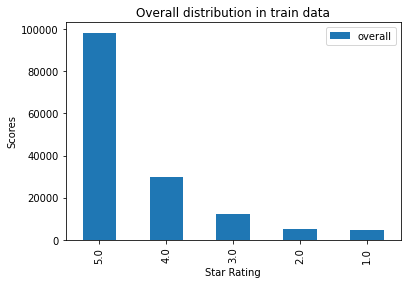

In [84]:
overall = overall_df.plot.bar()
plt.xlabel('Star Rating')  
plt.ylabel('Scores')
plt.title('Overall distribution in train data')
plt.show()

average star rating for different music category:

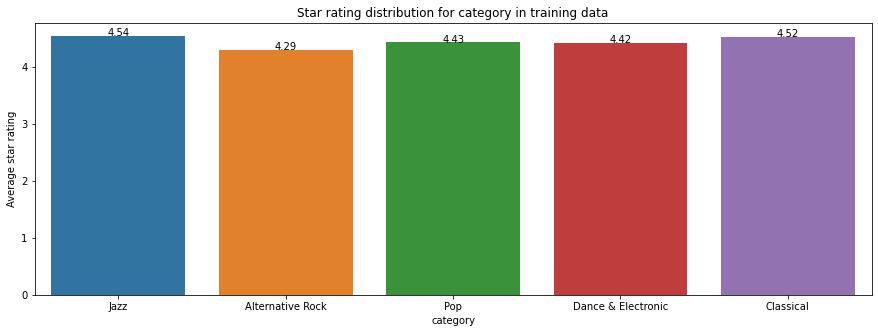

In [86]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
category_overall = preproced_train_df[['category','overall']].groupby(['category'],as_index=False).mean()
fig1, ax1 = plt.subplots(1,figsize=(15,5))
overall = sns.barplot(x='category',y='overall', data=category_overall, order=['Jazz','Alternative Rock','Pop','Dance & Electronic','Classical'], ax=ax1)
ax1.set_title('Star rating distribution for category in training data')
ax1.set_ylabel('Average star rating')
show_values_on_bars(ax1)
plt.show()

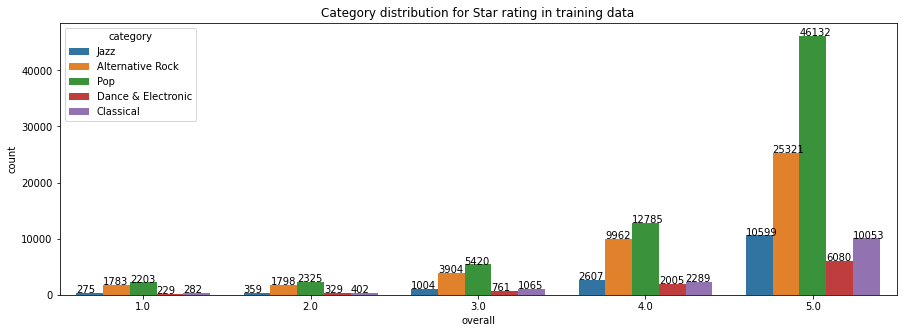

In [100]:

fig, ax = plt.subplots(1,figsize=(15,5))
overall_category = sns.countplot(x='overall', hue = 'category', data=preproced_train_df,ax=ax)
for p in overall_category.patches:
    overall_category.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1))
ax.set_title('Category distribution for Star rating in training data')
plt.show()

### Sentiment analyzatiion for different music type:


In [ ]:
preproced_train_df.category.unique()

array(['Jazz', 'Alternative Rock', 'Pop', 'Dance & Electronic',
       'Classical'], dtype=object)

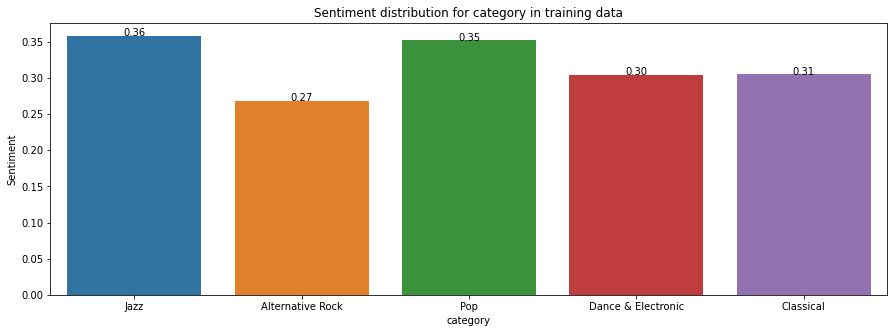

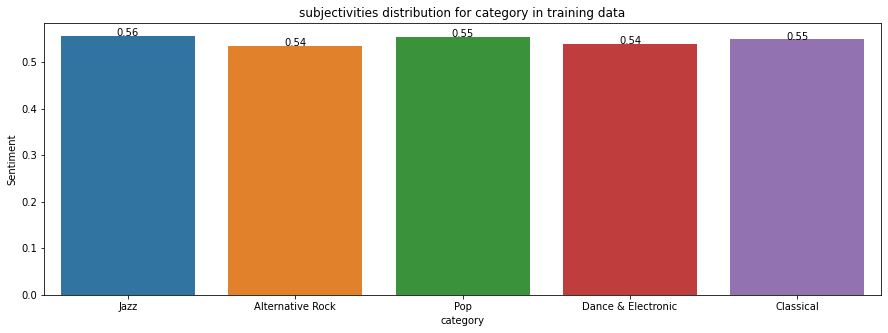

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
category_sentiment = preproced_train_df[['category','polarities']].groupby(['category'],as_index=False).mean()
fig1, ax1 = plt.subplots(1,figsize=(15,5))
category = sns.barplot(x='category',y='polarities', data=category_sentiment, order=['Jazz','Alternative Rock','Pop','Dance & Electronic','Classical'], ax=ax1)
ax1.set_title('Sentiment distribution for category in training data')
ax1.set_ylabel('Sentiment')
show_values_on_bars(ax1)
plt.show()

category_subjectivities = preproced_train_df[['category','subjectivities']].groupby(['category'],as_index=False).mean()
fig2, ax2 = plt.subplots(1,figsize=(15,5))
category = sns.barplot(x='category',y='subjectivities', data=category_subjectivities, order=['Jazz','Alternative Rock','Pop','Dance & Electronic','Classical'], ax=ax2)
ax2.set_title('subjectivities distribution for category in training data')
ax2.set_ylabel('Sentiment')
show_values_on_bars(ax2)
plt.show()


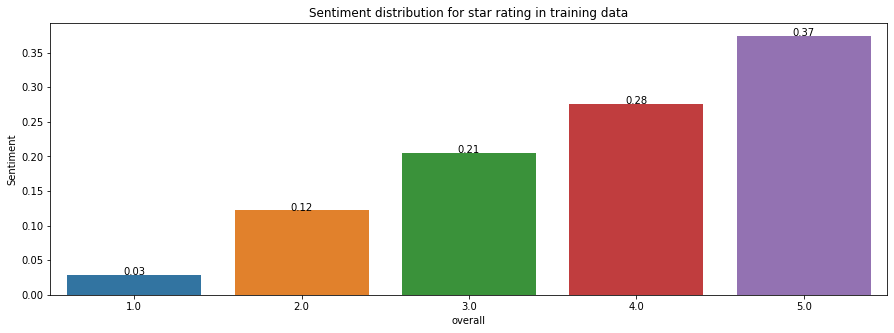

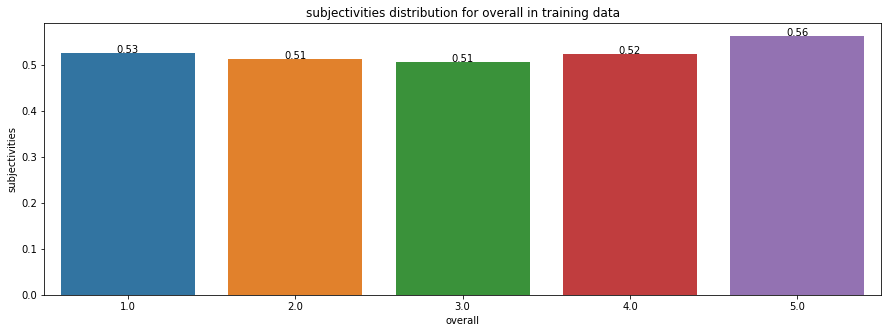

In [105]:
overall_sentiment = preproced_train_df[['overall','polarities']].groupby(['overall'],as_index=False).mean()
fig1, ax1 = plt.subplots(1,figsize=(15,5))
category = sns.barplot(x='overall',y='polarities', data=overall_sentiment, ax=ax1)
ax1.set_title('Sentiment distribution for star rating in training data')
ax1.set_ylabel('Sentiment')
show_values_on_bars(ax1)
plt.show()

overall_subjectivities = preproced_train_df[['overall','subjectivities']].groupby(['overall'],as_index=False).mean()
fig2, ax2 = plt.subplots(1,figsize=(15,5))
category = sns.barplot(x='overall',y='subjectivities', data=overall_subjectivities, ax=ax2)
ax2.set_title('subjectivities distribution for overall in training data')
ax2.set_ylabel('subjectivities')
show_values_on_bars(ax2)
plt.show()